# Projet 7 : Implémentez un modèle de scoring : DummyClassifier

L'objectif de ce notebook est de tester un modèle baseline de Classification étant DummyClassifier.



## Importation des modules

In [1]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns

##Split
from sklearn.model_selection import train_test_split

## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer

## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Warning
import warnings

In [3]:
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform, randint
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning

In [4]:
warnings.filterwarnings("ignore")

##  Importation de données

In [5]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek.csv")

In [7]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek.csv")

In [8]:
X_test_smtomek

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,-0.85,-0.626132,-0.119955,1.076045,0.153052,0.0,1.0,0.0,0.0,...,0.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,2.0
1,3.0,0.85,-0.124879,-0.474031,0.072745,-0.960826,1.0,3.0,0.0,0.0,...,1.0,5.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0
2,0.0,0.10,1.853058,-0.677654,-0.618674,148.378176,0.0,-1.0,0.0,0.0,...,0.0,6.0,1.0,1.0,1.0,2.0,1.0,0.0,7.0,0.0
3,1.0,0.45,0.550961,-0.556145,0.525028,0.136856,0.0,1.0,0.0,0.0,...,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
4,0.0,0.85,-0.667903,-0.620464,-0.394527,0.321085,-2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,0.0,-0.40,-0.676591,0.908077,-0.761551,148.378176,0.0,-1.0,0.0,0.0,...,0.0,6.0,1.0,1.0,1.0,2.0,1.0,4.0,9.0,4.0
123001,1.0,0.60,0.051562,-0.119955,0.537404,-0.745824,5.0,0.0,0.0,0.0,...,0.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,0.0
123002,1.0,0.60,1.136608,0.044970,0.100798,-1.094443,0.0,1.0,0.0,0.0,...,0.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,7.0,1.0
123003,0.0,-0.40,0.441704,0.000000,-0.495187,-1.054763,0.0,-1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,7.0,2.0


##  DummyClassifier

Les métriques de base sont :    

La [précision](https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel) est le nombre d'éléments étant de vrais positifs par rapport au total des éléments.

Le [recall](https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel) est le nombre de vrais positifs par rapport au nombre total d'éléments positifs.

[L'accuracy](https://kobia.fr/classification-metrics-accuracy/) permet de décrire la performance du modèle sur les individus positifs et négatifs de façon symétrique. Elle mesure le taux de prédictions correctes sur l’ensemble des individus.

[L'AUC ROC](https://kobia.fr/classification-metrics-auc-roc/) :  Pour prendre en compte le compromis entre la sensitivity et la Specificity, on calcule une métrique qui résume la performance globale du modèle : l’AUC ROC, aussi noté AUROC.

Le terme AUC signifie  Area Under the Curve, aire sous la courbe en français. La métrique AUC ROC consiste donc à calculer l’aire sous la courbe ROC. Plus le score est proche de 1, plus notre modèle est performant.


In [9]:
from sklearn.dummy import DummyClassifier

In [10]:
rnd_clf = DummyClassifier(strategy='uniform', random_state=42)
rnd_clf.fit(X_train_smtomek, y_train_smtomek)
clf=rnd_clf

In [11]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [12]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, clf.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, clf.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, clf.predict(X_train_smtomek))}')

Accuracy: 0.49991870183083476
Precision: 0.08139459318949831
Recall: 0.5020040080160321


In [13]:
print(f'Accuracy: {accuracy_score(y_test_smtomek, clf.predict(X_test_smtomek))}')
print(f'Precision: {precision_score(y_test_smtomek, clf.predict(X_test_smtomek))}')
print(f'Recall: {recall_score(y_test_smtomek, clf.predict(X_test_smtomek))}')

Accuracy: 0.4997113938457786
Precision: 0.08095091377884443
Recall: 0.506544901065449


In [14]:
y_prob = rnd_clf.predict_proba(X_test_smtomek)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rnd_clf.score(X_test_smtomek, y_pred)

0.4986626559895939

In [15]:
from sklearn import metrics

In [16]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smtomek, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[113150      0]
 [  9855      0]]

True Positives(TP) =  113150

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  9855


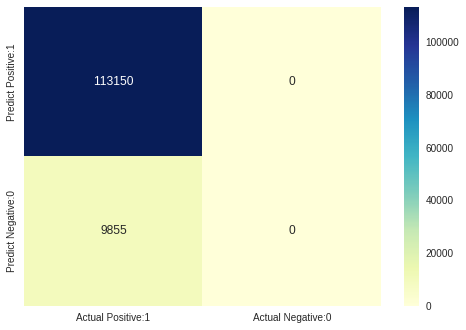

In [17]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [18]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.5

In [19]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

On en conclut ici que l'AUC Score étant de 0.5 notre modèle baseline est peu performant.

Text(0.5, 0, 'False Positive Rate')

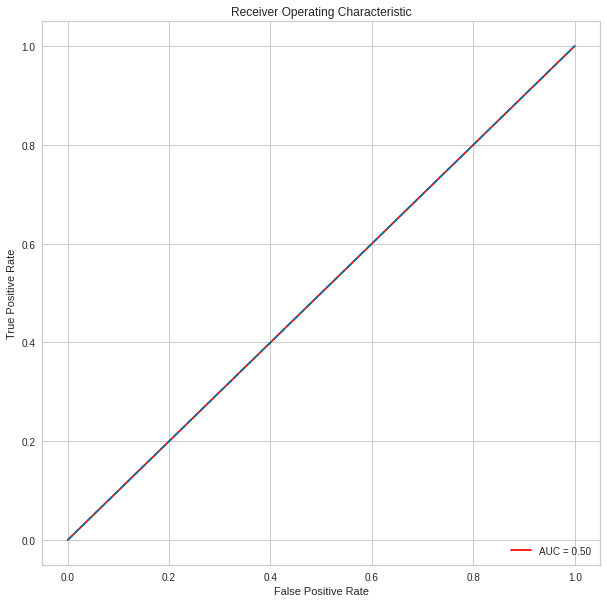

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')